In [ ]:
pip install idx2numpy

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\bkhan\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Performing Data Exploration: 


### 1. Reading the Data and Loading the Data for Exploration 
### 2.Data Inspection: By examining the dataset to understand its basic characteristics like number of images, shape of the test and train images

### 3.Data Preprocessing:We have to perform data normalization, resizing, and reshaping to prepare it for machine learning tasks
### 4.Data Visualization: Understanding the dataset by visualization
### 3.Feature Statistics: Calculate and inspect basic statistics for the image data

In [2]:
# File paths for the MNIST dataset files
from mlxtend.data import loadlocal_mnist
train_images_path = "MNIST_DATASET/train-images.idx3-ubyte"
train_labels_path = 'MNIST_DATASET/train-labels.idx1-ubyte'
test_images_path = 'MNIST_DATASET/t10k-images.idx3-ubyte'
test_labels_path = 'MNIST_DATASET/t10k-labels.idx1-ubyte'

# Loading Data
X_train, y_train = loadlocal_mnist(train_images_path,train_labels_path)
X_test, y_test = loadlocal_mnist(test_images_path, test_labels_path)

In [3]:
# Data preprocessing: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Checking dimension

In [49]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X_train.shape

(60000, 784)

In [51]:
y_train.shape

(60000,)

In [4]:
# Normalizing pixel values to the [0, 1] range
X_train_normalized = X_train.astype('float32') / 255
X_test_normalized = X_test.astype('float32') / 255

# Normalizing pixel values to the [0, 1] range
y_train_normalized = y_train.astype('float32') / 255
y_test_normalized = y_test.astype('float32') / 255

In [53]:
# 3.Feature Statistics:

# Statistics of pixel values
print("Min pixel value:", np.min(X_train))
print("Max pixel value:", np.max(X_train))
print("Mean pixel value:", np.mean(X_train))
print("Standard deviation of pixel values:", np.std(X_train))


Min pixel value: -1.2742078920822268
Max pixel value: 244.94693302873063
Mean pixel value: -2.1974863349995617e-18
Standard deviation of pixel values: 0.9563162742140049


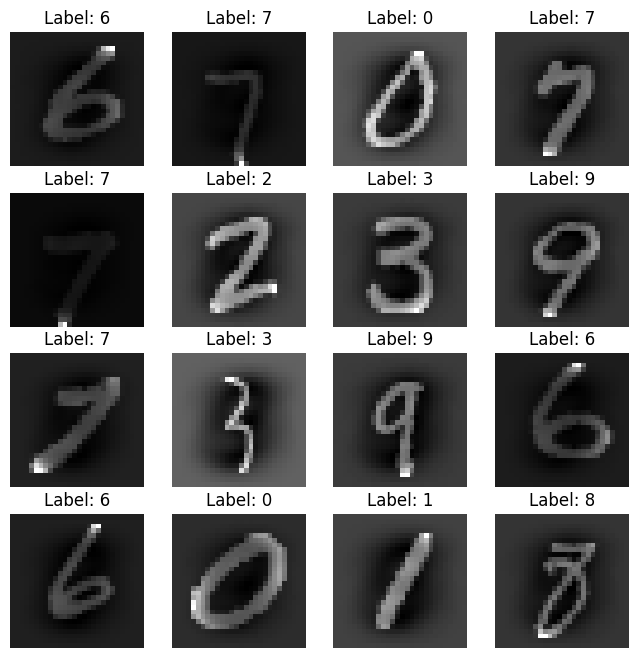

In [27]:
# Display random sample images from train dataset

X_train_reshaped = X_train_normalized.reshape(-1, 28, 28)   # Reshaping the images to 28x28
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train_reshaped[rand_idx], cmap='gray')
    ax.set_title(f"Label: {y_train[rand_idx]}")
    ax.axis('off')
plt.show()

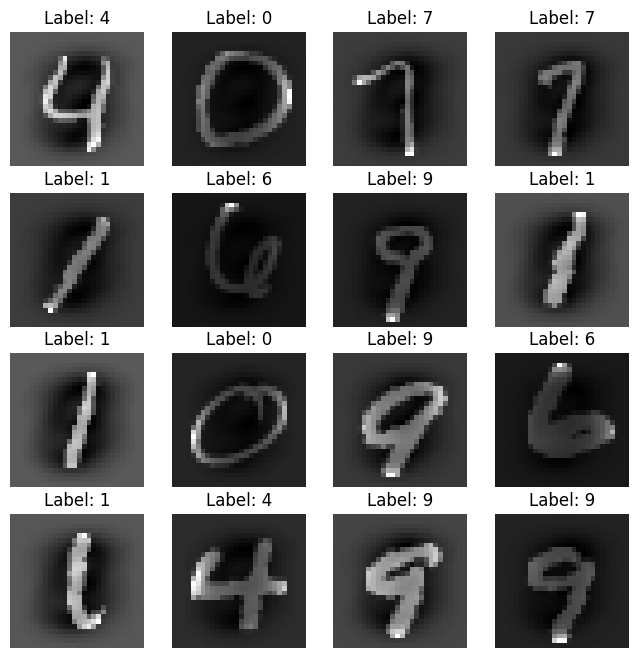

In [29]:
# Display random sample images from test dataset

X_test_reshaped = X_test_normalized.reshape(-1, 28, 28)
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    rand_idx = np.random.randint(0, len(X_test))
    ax.imshow(X_test_reshaped[rand_idx], cmap='gray')
    ax.set_title(f"Label: {y_test[rand_idx]}")
    ax.axis('off')
plt.show()

## Random Forest

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
# y random forest prediction
y_prediction = rf_model.predict(X_test)

In [ ]:
# Evaluating the model on the validation set
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, average='macro')
recall = recall_score(y_test, y_prediction, average='macro')
f1 = f1_score(y_test, y_prediction, average='macro')

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

Validation Accuracy: 0.9698
Validation Precision: 0.9696279227893136
Validation Recall: 0.9695427640485089
Validation F1-Score: 0.969559694700374


In [ ]:
print ("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_prediction))      # Calculating Classification Report

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



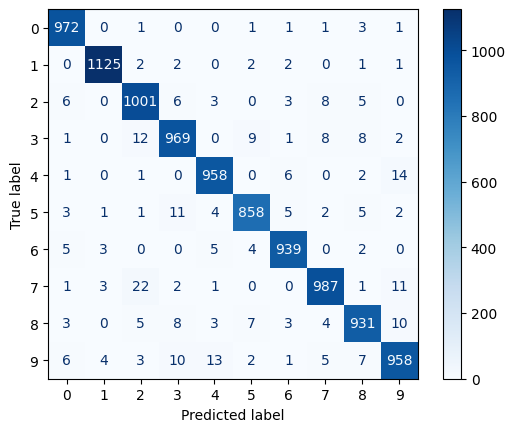

In [ ]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_prediction)
ConfusionMatrixDisplay(confusion_mat, display_labels=rf_model.classes_).plot(cmap='Blues')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

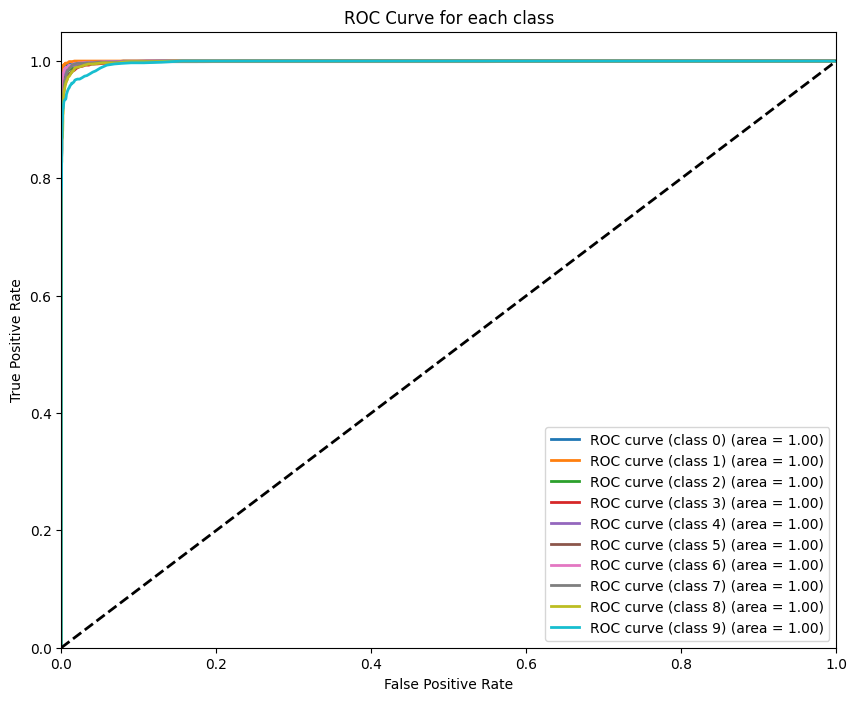

In [ ]:
# ROC Curve: We take only 10 classes
y_val_bin = label_binarize(y_test, classes=range(10))  
 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_val_prob = rf_model.predict_proba(X_test)
 
for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.figure(figsize=(10, 8))
for i in range(10):  
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors model

In [30]:
# K-Nearest Neighbors model
k = 5  # We take number of neighbors (k) as needed
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# Evaluaing the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)


Validation Accuracy: 0.9443
Validation Precision: 0.9442112613151517
Validation Recall: 0.9435861911754685
Validation F1-Score: 0.9436860218534469


In [70]:
print ("Classification Report for K-Nearest Neighbors model:")
print(classification_report(y_test, y_pred))

Classification Report for K-Nearest Neighbors model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



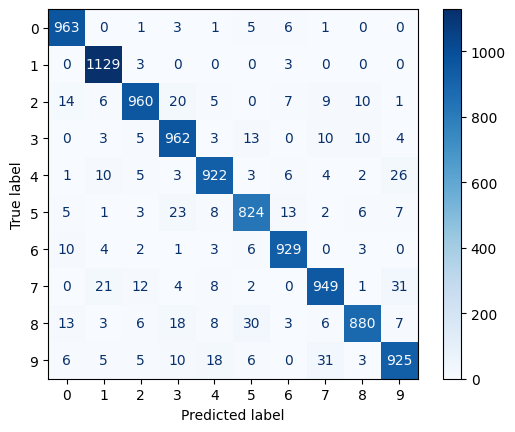

In [72]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat, display_labels=knn_model.classes_).plot(cmap='Blues')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

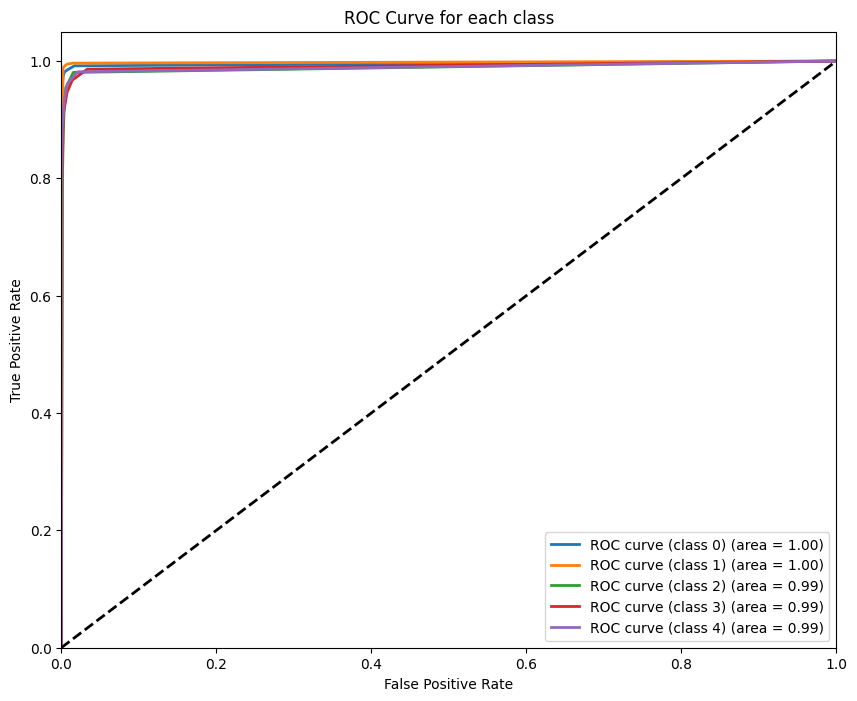

In [31]:
# ROC Curve: We take only 10 classes
y_val_bin = label_binarize(y_test, classes=range(5))  
 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_val_prob = knn_model.predict_proba(X_test)
 
for i in range(5):  
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.figure(figsize=(10, 8))
for i in range(5):  
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

## XGBOOST

In [89]:
# Creating a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 10,  # Number of classes
    'max_depth': 6,  # Maximum depth of trees
    'eta': 0.3,  # Learning rate
}

num_round = 100  # Number of boosting rounds

# Training the XGBoost model
xgmodel = xgb.train(params, dtrain, num_round)
y_pred = xgmodel.predict(dtest)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

Validation Accuracy: 0.9795
Validation Precision: 0.9794780197056404
Validation Recall: 0.9793675399386542
Validation F1-Score: 0.9794125541099374


In [90]:
print ("Classification Report for XGBoost model:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



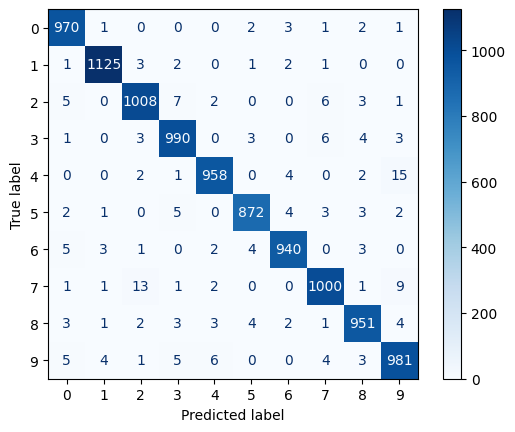

In [91]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat).plot(cmap='Blues')

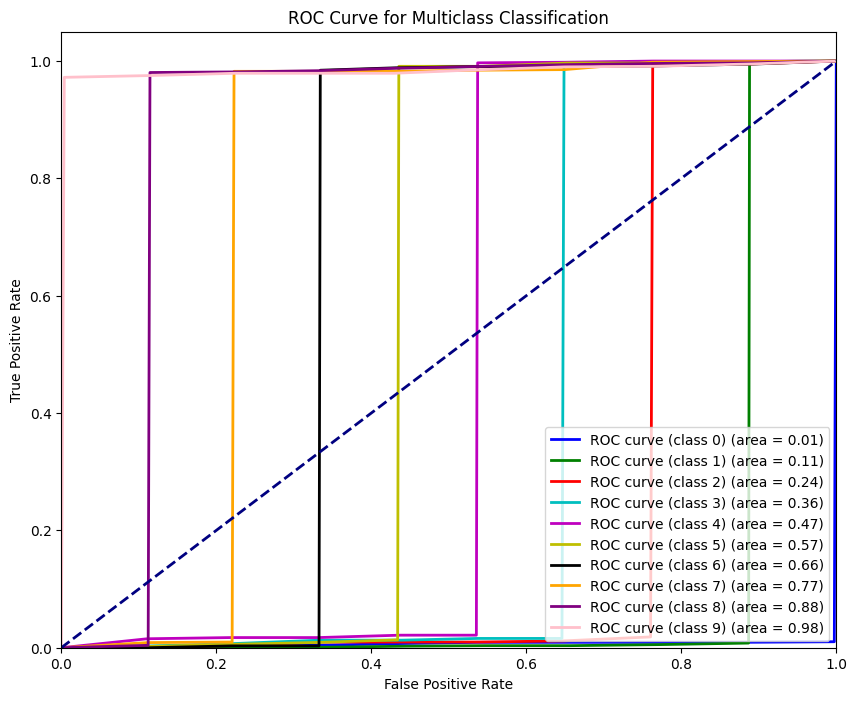

In [81]:
#ROC Curve
n_classes = 10  # Number of classes 
y_test_bin = np.eye(n_classes)[y_test]
# y_prob = xgmodel.predict(dtest)

# Initializing variables to store ROC curves and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculating ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],  color=colors[i], lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])           
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


## Decision Tree Model

In [ ]:
# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_test_pred = dt_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

Validation Accuracy: 0.8755
Validation Precision: 0.874125544467508
Validation Recall: 0.8739155900680405
Validation F1-Score: 0.8739656524416424


In [ ]:
print ("Classification Report for Decision Tree Model:")
print(classification_report(y_test, y_test_pred))

Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



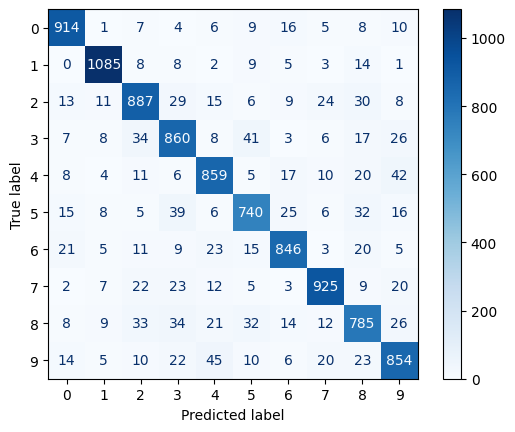

In [ ]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_mat, display_labels=dt_model.classes_).plot(cmap='Blues')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

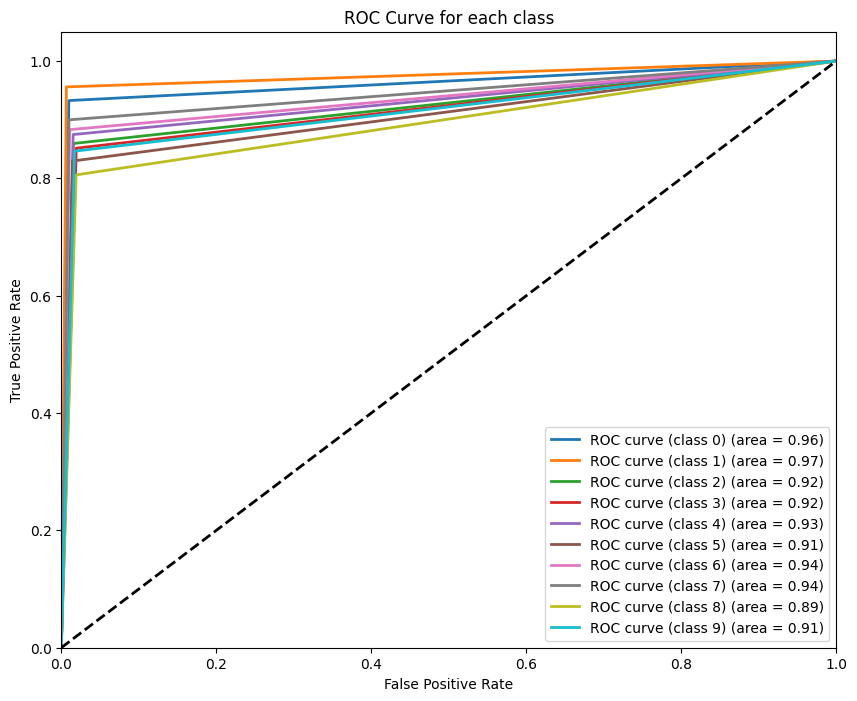

In [ ]:
# ROC Curve
y_val_bin = label_binarize(y_test, classes=range(10))  # We take only 10 classes
 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_val_prob = dt_model.predict_proba(X_test)
 
for i in range(10): 
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.figure(figsize=(10, 8))
for i in range(10): 
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [6]:
logistic_reg_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))     
logistic_reg_model.fit(X_train, y_train)

y_pred = logistic_reg_model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1-Score:", f1)

Validation Accuracy: 0.9211
Validation Precision: 0.9202322436126005
Validation Recall: 0.9200280093615959
Validation F1-Score: 0.9200585713361231


In [7]:
print ("Classification Report for Logistic Regression model:")
print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.91      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



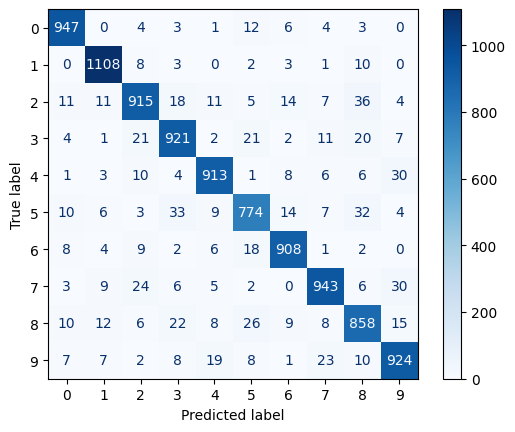

In [8]:
# Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_mat, display_labels=logistic_reg_model.classes_).plot(cmap='Blues')

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

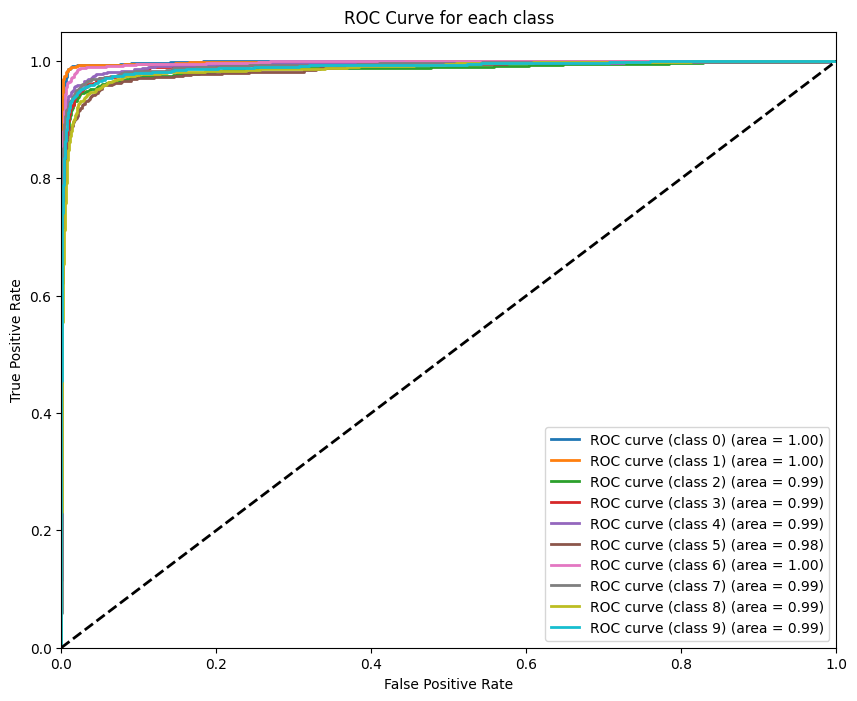

In [10]:
# ROC Curve
y_val_bin = label_binarize(y_test, classes=range(10))  # We take only 10 classes
 
fpr = dict()
tpr = dict()
roc_auc = dict()
y_val_prob = logistic_reg_model.predict_proba(X_test)
 
for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
 
    plt.figure(figsize=(10, 8))
for i in range(10):  
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d) (area = %0.2f)' % (i, roc_auc[i]))
 
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc="lower right")
plt.show()